In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
import time
from sklearn.preprocessing import MinMaxScaler,StandardScaler

df = pd.read_excel('/content/drive/MyDrive/Colab Notebooks/31_DM/30_homeWork3/Dry_Bean_Dataset.xlsx')

x: pd.DataFrame = df.iloc()[:, :-1]
x


scaler = StandardScaler()
x_nol = scaler.fit_transform(x)

# KMeans  fit


In [ ]:
k_stat = time.time()
k_means = KMeans()
k_means_lable = k_means.fit_predict(x_nol)
k_end = time.time() - k_stat
print(f'using time is {k_end*1000:.6f} ms ')

using time is 1345.382452 ms 


In [ ]:
k_means_lable

array([0, 0, 0, ..., 5, 5, 5], dtype=int32)

In [ ]:
df['k_means_lable'] = k_means_lable

df_k_means = df.pivot_table(index=['k_means_lable'],
                     columns=['Class'],
                     values=['Area'],
                     aggfunc="count")

df_k_means.columns = df['Class'].value_counts().index
df_k_means = df_k_means.fillna(value=0)
df_k_means

,DERMASON,SIRA,SEKER,HOROZ,CALI,BARBUNYA,BOMBAY
k_means_lable,,,,,,,
0,8.0,0.0,2.0,114.0,0.0,1870.0,23.0
1,200.0,0.0,1352.0,0.0,64.0,0.0,10.0
2,1001.0,1.0,22.0,1.0,0.0,11.0,6.0
3,0.0,0.0,0.0,2909.0,2.0,55.0,199.0
4,8.0,0.0,12.0,7.0,1633.0,0.0,63.0
5,80.0,0.0,31.0,504.0,50.0,89.0,2312.0
6,25.0,1.0,211.0,11.0,179.0,2.0,23.0
7,0.0,520.0,0.0,0.0,0.0,0.0,0.0


# purity

In [ ]:
def get_purity(df: pd.DataFrame):
    temp = df / df.sum()
    purity = temp.max()
    return purity


df_k_means['purity'] = df_k_means.apply(get_purity, axis=1)
df_k_means['purity_weight'] = (df_k_means['purity'] * (df_k_means.iloc()[:, :-1].sum(axis=1) / df_k_means.iloc()[:, :-1].sum(axis=1).sum()))
k_means_total_purity = df_k_means['purity_weight'].sum()
print(f'total purity for DBSCAN is {k_means_total_purity:.6f}')
df_k_means

total purity for DBSCAN is 0.867534


,DERMASON,SIRA,SEKER,HOROZ,CALI,BARBUNYA,BOMBAY,purity,purity_weight
k_means_lable,,,,,,,,,
0,8.0,0.0,2.0,114.0,0.0,1870.0,23.0,0.927119,0.137389
1,200.0,0.0,1352.0,0.0,64.0,0.0,10.0,0.831488,0.099331
2,1001.0,1.0,22.0,1.0,0.0,11.0,6.0,0.960653,0.073543
3,0.0,0.0,0.0,2909.0,2.0,55.0,199.0,0.919115,0.213724
4,8.0,0.0,12.0,7.0,1633.0,0.0,63.0,0.947766,0.119976
5,80.0,0.0,31.0,504.0,50.0,89.0,2312.0,0.754077,0.169863
6,25.0,1.0,211.0,11.0,179.0,2.0,23.0,0.466814,0.015502
7,0.0,520.0,0.0,0.0,0.0,0.0,0.0,1.000000,0.038204


In [ ]:
total_purity_list=[]

for i in range(3,30,1):
  df1=df.iloc()[:,:-1].copy()
  temp = KMeans(n_clusters=i)
  temp_lable = temp.fit_predict(x_nol)
  df1['KMeans_lable'] = temp_lable

  df_temp = df1.pivot_table(index=['KMeans_lable'],
                      columns=['Class'],
                      values=['Area'],
                      aggfunc="count")

  df_temp.columns = df1['Class'].value_counts().index
  df_temp = df_temp.fillna(value=0)

  df_temp['purity'] = df_temp.apply(get_purity, axis=1)
  df_temp['purity_weight'] = (df_temp['purity'] * (df_temp.iloc()[:, :-1].sum(axis=1) / df_temp.iloc()[:, :-1].sum(axis=1).sum()))
  KMeans_total_purity = df_temp['purity_weight'].sum()
  total_purity_list.append(KMeans_total_purity)


In [ ]:
df_temp=pd.DataFrame(total_purity_list,index=range(3,30,1))
df_temp

,0
3,0.436265
4,0.555066
5,0.667107
6,0.655940
7,0.798398
8,0.867460
9,0.870032
10,0.856072
11,0.841966
12,0.849019


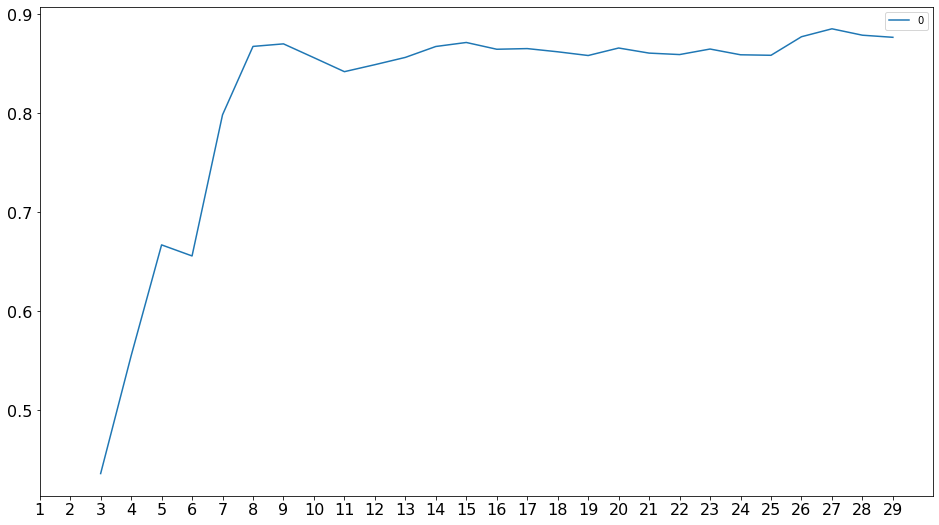

In [ ]:
df_temp.plot(figsize=(16,9),xticks=range(1,30,1),fontsize=16)